<a href="https://colab.research.google.com/github/Parul077/Learning_DataScience/blob/main/PR_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [3]:
X = 6*np.random.rand(200,1)-3
y =  0.8*X**2 + 0.9*X + 2 + np.random.randn(200,1)

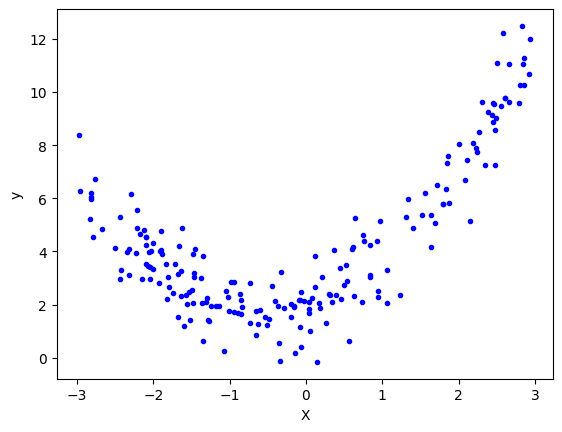

In [4]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [6]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [7]:
y_pred = lr.predict(X_test)
r2_score_lr = r2_score(y_test, y_pred)
print("R2-score is:", r2_score_lr)

R2-score is: 0.40766970982682715


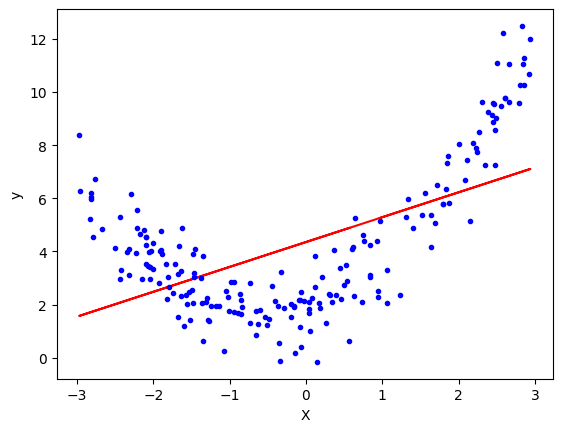

In [8]:
plt.plot(X_train,lr.predict(X_train), color='r')
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Applying Polynomial Linear Regression


In [9]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

In [10]:
print(X_train[0])

[0.56939131]


In [11]:
print(X_train_trans[0])

[1.         0.56939131 0.32420646]


In [12]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(X_test_trans)
r2_score_lr = r2_score(y_test, y_pred)
print("R2-score is:", r2_score_lr)

R2-score is: 0.9238357119229488


In [14]:
print(lr.coef_)

[[0.         0.89146279 0.81322592]]


In [15]:
print(lr.intercept_)

[2.03591466]


In [17]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

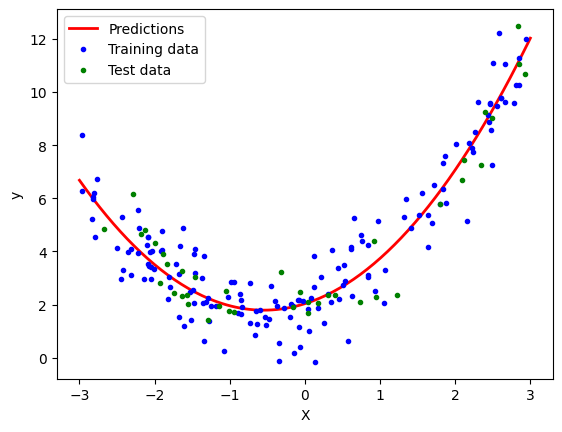

In [19]:
plt.plot(X_new, y_new,"r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.", label="Training data")
plt.plot(X_test, y_test, "g.", label="Test data")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [20]:
def polynomial_regression(degree):
  X_new = np.linspace(-3,3,100).reshape(100,1)
  X_new_poly = poly.transform(X_new)

  polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()
  polynomial_regression = Pipeline([
      ("poly_features", polybig_features),
      ("std_scaler", std_scaler),
      ("lin_reg", lin_reg)
  ])
  polynomial_regression.fit(X,y)
  y_newbig = polynomial_regression.predict(X_new)
  plt.plot(X_new, y_newbig, "r", linewidth=2, label="Degree" + str(degree))
  plt.plot(X_train, y_train, "b.")
  plt.plot(X_test, y_test, "g.")
  plt.legend()
  plt.xlabel("X")
  plt.ylabel("y")
  plt.axis([-3,3,0,10])
  plt.show()


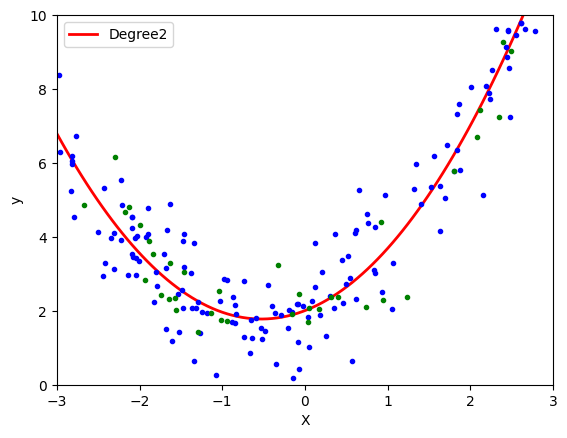

In [22]:
polynomial_regression(2)

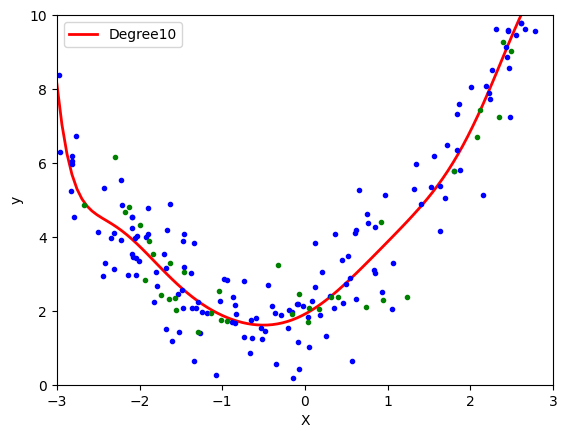

In [23]:
polynomial_regression(10)

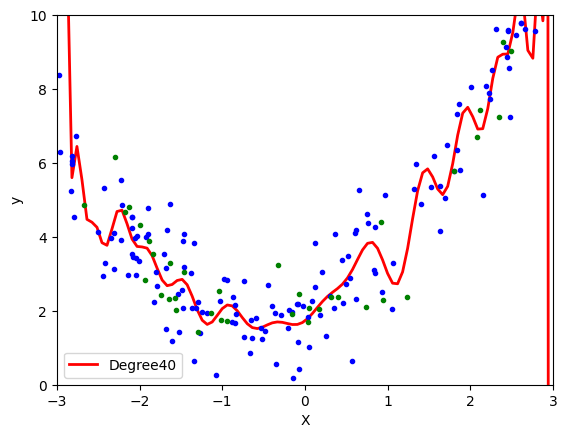

In [24]:
polynomial_regression(40)

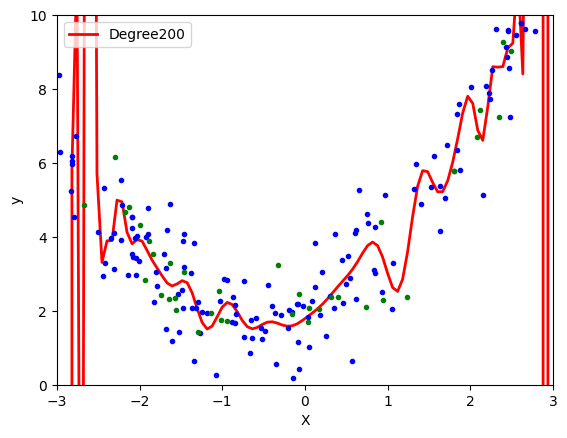

In [25]:
polynomial_regression(200)

In [26]:
poly.powers_

array([[0],
       [1],
       [2]])

### visualizing the data using 3D plot


In [27]:
x = 7*np.random.rand(100,1)-2.8
y = 7*np.random.rand(100,1)-2.8
z =  x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.randn(100,1)


In [28]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()